# Pilot Validation

Minimal checks for the pilot corpus scan outputs.

In [ ]:
from pathlib import Path
import pandas as pd
import yaml
import matplotlib.pyplot as plt

# Configure pandas display options to show full content
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

ROOT = Path('..')
config = yaml.safe_load((ROOT / 'configs/pilot.yaml').read_text())
seed = int(config['project']['seed'])

interim = ROOT / 'data/interim'
parquet_path = sorted(interim.glob('cc_pilot_corpus_*.parquet'))[-1]
top_domains_path = sorted(interim.glob('cc_scan_top_domains_*.csv'))[-1]

print('Corpus:', parquet_path)
print('Top domains:', top_domains_path)

corpus = pd.read_parquet(parquet_path)
top_domains = pd.read_csv(top_domains_path)
total_hits = len(corpus)
total_hits

Corpus: ../data/interim/cc_pilot_corpus_20260207_191852.parquet
Top domains: ../data/interim/cc_scan_top_domains_20260207_191852.csv


728

In [2]:
# Top 20 domains by hit count + share
top20 = top_domains.head(20).copy()
top20['share'] = (top20['hits'] / total_hits).round(4)
top20


,registered_domain,hits,share
0,blogspot.com,29,0.0398
1,medicalxpress.com,21,0.0288
2,twinkl.co.uk,21,0.0288
3,sciencedaily.com,16,0.0220
4,evitamins.com,14,0.0192
5,mycity4kids.com,10,0.0137
6,wordpress.com,10,0.0137
7,myaspergerschild.com,8,0.0110
8,holidays.net,7,0.0096
9,healthline.com,7,0.0096


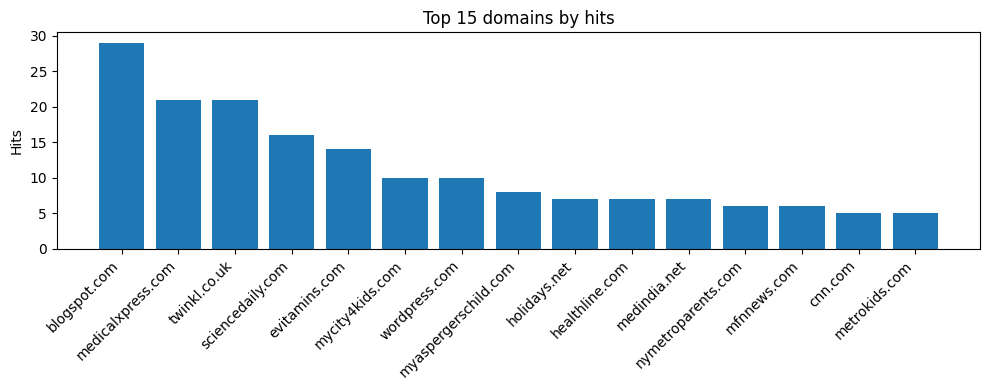

In [3]:
# Bar chart of top 15 domains
top15 = top_domains.head(15)
plt.figure(figsize=(10, 4))
plt.bar(top15['registered_domain'], top15['hits'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Hits')
plt.title('Top 15 domains by hits')
plt.tight_layout()
plt.show()


In [4]:
# Random sample of 25 hits (seeded)
sample_cols = ['matched_term', 'registered_domain', 'url', 'context_snippet']
corpus.sample(n=25, random_state=seed)[sample_cols]


,matched_term,registered_domain,url,context_snippet
230,autism_patterns[0],gpo.gov,https://www.gpo.gov/fdsys/granule/CRI-2012/CRI...,"| More MIKULSKI, BARBARA A. (a Senator from Ma..."
345,adhd_patterns[0],creativeedge.com,http://www.creativeedge.com/book/web-applicati...,of ContentsIndexCopyrightAbout the AuthorWE WA...
332,autism_patterns[1],armc.com,http://www.armc.com/armc-main/community/health...,"s, but these features develop over time and ma..."
192,autism_patterns[0],vitals.com,http://www.vitals.com/doctors/Dr_Uwe_Koepke.html,e persistent asthma patient education guide ex...
723,autism_patterns[0],thrilloutdoor.com,https://www.thrilloutdoor.com/product/rawlings...,rt Sale! Overcome Average Hooded Long Sleeve T...
429,asd_pattern,twinkl.co.uk,http://www.twinkl.co.uk/resource/t-w-28565-num...,eds Autism Spectrum Disorders PSHCE KS3/KS4 Ma...
639,autism_patterns[0],mfnnews.com,https://mfnnews.com/news/fox-news/bf68aaa1-9f7...,Auction Audience applauds trump August pfluger...
246,autism_patterns[0],sciencedaily.com,https://www.sciencedaily.com/releases/2012/11/...,ow: Health & Medicine Allergy Alternative Medi...
679,autism_patterns[0],venuemarketplace.com,https://venuemarketplace.com/fashion-jewelry-s...,che bracelet is the perfect accessory to wear ...
431,autism_patterns[2],twinkl.co.uk,http://www.twinkl.co.uk/resource/t-w-3671-numb...,red Reviews Parents Individual Needs Organisat...


In [5]:
# All ASD-labeled rows
asd_rows = corpus[corpus['matched_term'] == 'asd_pattern']
asd_rows[sample_cols]


,matched_term,registered_domain,url,context_snippet
72,asd_pattern,autismafter16.com,http://www.autismafter16.com/article/11-04-201...,aster. What code is in the image?: * Enter the...
177,asd_pattern,twinkl.co.uk,http://www.twinkl.co.uk/resource/po-t-t-12241-...,"cation and Interaction Speech, Language and Co..."
180,asd_pattern,twinkl.co.uk,http://www.twinkl.co.uk/resources/early-years-...,"cation and Interaction Speech, Language and Co..."
183,asd_pattern,twinkl.co.uk,http://www.twinkl.co.uk/resources/reading-comp...,"cation and Interaction Speech, Language and Co..."
186,asd_pattern,twinkl.co.uk,http://www.twinkl.co.uk/zip-pack/keystage3-ks3...,"cation and Interaction Speech, Language and Co..."
208,asd_pattern,brainmass.com,https://brainmass.com/sociology/theoretical-fr...,"ussion, you will consider attachment styles an..."
429,asd_pattern,twinkl.co.uk,http://www.twinkl.co.uk/resource/t-w-28565-num...,eds Autism Spectrum Disorders PSHCE KS3/KS4 Ma...
432,asd_pattern,twinkl.co.uk,http://www.twinkl.co.uk/resource/t-w-3671-numb...,eds Autism Spectrum Disorders PSHCE KS3/KS4 Ma...
435,asd_pattern,twinkl.co.uk,http://www.twinkl.co.uk/resources/senior-leade...,eds Autism Spectrum Disorders PSHCE KS3/KS4 Ma...
508,asd_pattern,scope.org.uk,https://forum.scope.org.uk/discussion/34658/so...,Son with ASD diagnosis not in school and isola...
